# Preparation

In [2]:
%pip install mediapipe
%pip list --format=freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
!curl "https://storage.googleapis.com/mediapipe-assets/business-person.png" -O
%mv business-person dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1069k  100 1069k    0     0  8343k      0 --:--:-- --:--:-- --:--:-- 8762k


# Main

In [1]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [9]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
import cv2
from cv2 import imshow

In [2]:
# Load model from 'https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/latest/face_landmarker.task'
trained_model_path = './models/face_landmarker.task'

In [4]:
BaseOptions = mp.tasks.BaseOptions
FaceLandmarker = mp.tasks.vision.FaceLandmarker
FaceLandmarkerOptions = mp.tasks.vision.FaceLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

In [21]:
base_options = python.BaseOptions(
    model_asset_path='./models/face_landmarker.task')
options = FaceLandmarkerOptions(
    base_options=base_options,
    # running_mode=VisionRunningMode.IMAGE,
    output_face_blendshapes=True,
    output_facial_transformation_matrixes=True,
    num_faces=1,
)

In [22]:
detector = FaceLandmarker.create_from_options(options)
detector

W0000 00:00:1699793233.563175       1 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.


In [7]:
mp_image = mp.Image.create_from_file('./dataset/business-person.png')
mp_image

In [26]:
face_landmarker_result = detector.detect(mp_image)
face_landmarker_result

FaceLandmarkerResult(face_landmarks=[[NormalizedLandmark(x=0.5364603996276855, y=0.2776332199573517, z=-0.022420182824134827, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.53795325756073, y=0.25370556116104126, z=-0.06193271651864052, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5362605452537537, y=0.2598152756690979, z=-0.028677919879555702, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5250566601753235, y=0.22575010359287262, z=-0.05383102223277092, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5375298857688904, y=0.24548472464084625, z=-0.0676577091217041, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5360850095748901, y=0.23402294516563416, z=-0.06557535380125046, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5319846868515015, y=0.20557335019111633, z=-0.04199567809700966, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4446960687637329, y=0.20130586624145508, z=-0.0022310432977974415, visibility=0.0, presence=0.0), NormalizedL

In [10]:
def draw_landmarks_on_image(rgb_image, detection_result):
    face_landmarks_list = detection_result.face_landmarks
    annotated_image = np.copy(rgb_image)

    # Loop through the detected faces to visualize
    for idx in range(len(face_landmarks_list)):
        face_landmarks = face_landmarks_list[idx]
        face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()

        face_landmarks_proto.landmark.extend(
            [
                landmark_pb2.NormalizedLandmark(
                    x=landmark.x,
                    y=landmark.y,
                    z=landmark.z,
                ) for landmark in face_landmarks
            ]
        )
        solutions.drawing_utils.draw_landmarks(  # x coord maybe...
            image=annotated_image,
            landmark_list=face_landmarks_proto,
            connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp.solutions.drawing_styles\
            .get_default_face_mesh_tesselation_style()
        )
        solutions.drawing_utils.draw_landmarks(  # y coord
            image=annotated_image,
            landmark_list=face_landmarks_proto,
            connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp.solutions.drawing_styles\
            .get_default_face_mesh_tesselation_style()
        )
        solutions.drawing_utils.draw_landmarks(  # y coord
            image=annotated_image,
            landmark_list=face_landmarks_proto,
            connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp.solutions.drawing_styles\
            .get_default_face_mesh_tesselation_style()
        )

    return annotated_image

In [31]:
def plot_face_blendshapes_bar_graph(face_blendshapes):
    # Extract the face blendshapes category names ans scores
    face_blendshapes_names = [
        face_blendshapes_category.category_name
        for face_blendshapes_category in face_blendshapes
    ]
    face_blendshapes_scores = [
        face_blendshapes_category.score
        for face_blendshapes_category in face_blendshapes
    ]
    face_blendshapes_ranks = range(len(face_blendshapes_names))
    fig, ax = plt.subplots(figsize=(12, 12))
    bar = ax.barh(
        face_blendshapes_ranks,
        face_blendshapes_scores,
        label=[
            str(x) for x in face_blendshapes_ranks
        ]
    )

    ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
    ax.invert_yaxis()

    # Label each bar with values
    for score, patch in zip(face_blendshapes_scores, bar.patches):
        plt.text(
            patch.get_x() + patch.get_width(),
            patch.get_y(),
            f'{score:.4f}',
            va='top'
        )
    ax.set_xlabel('Score')
    ax.set_title('Face Blendshapes')
    plt.tight_layout()
    plt.show()

In [23]:
annotated_image = draw_landmarks_on_image(
    mp_image.numpy_view(), face_landmarker_result)
imshow('', cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

"""
The problem is that the image box is using the same Python process as the kernel. 
When you execute this from an interactive shell, 
the shell waits for you to get back from the image display box. 
But Jupyter wants to claim control back after you executed a command block. 
Therefore it is not happy to wait for the window, and you lose control of the Python process, 
crashing everything.
"""
cv2.waitKey(0)

113

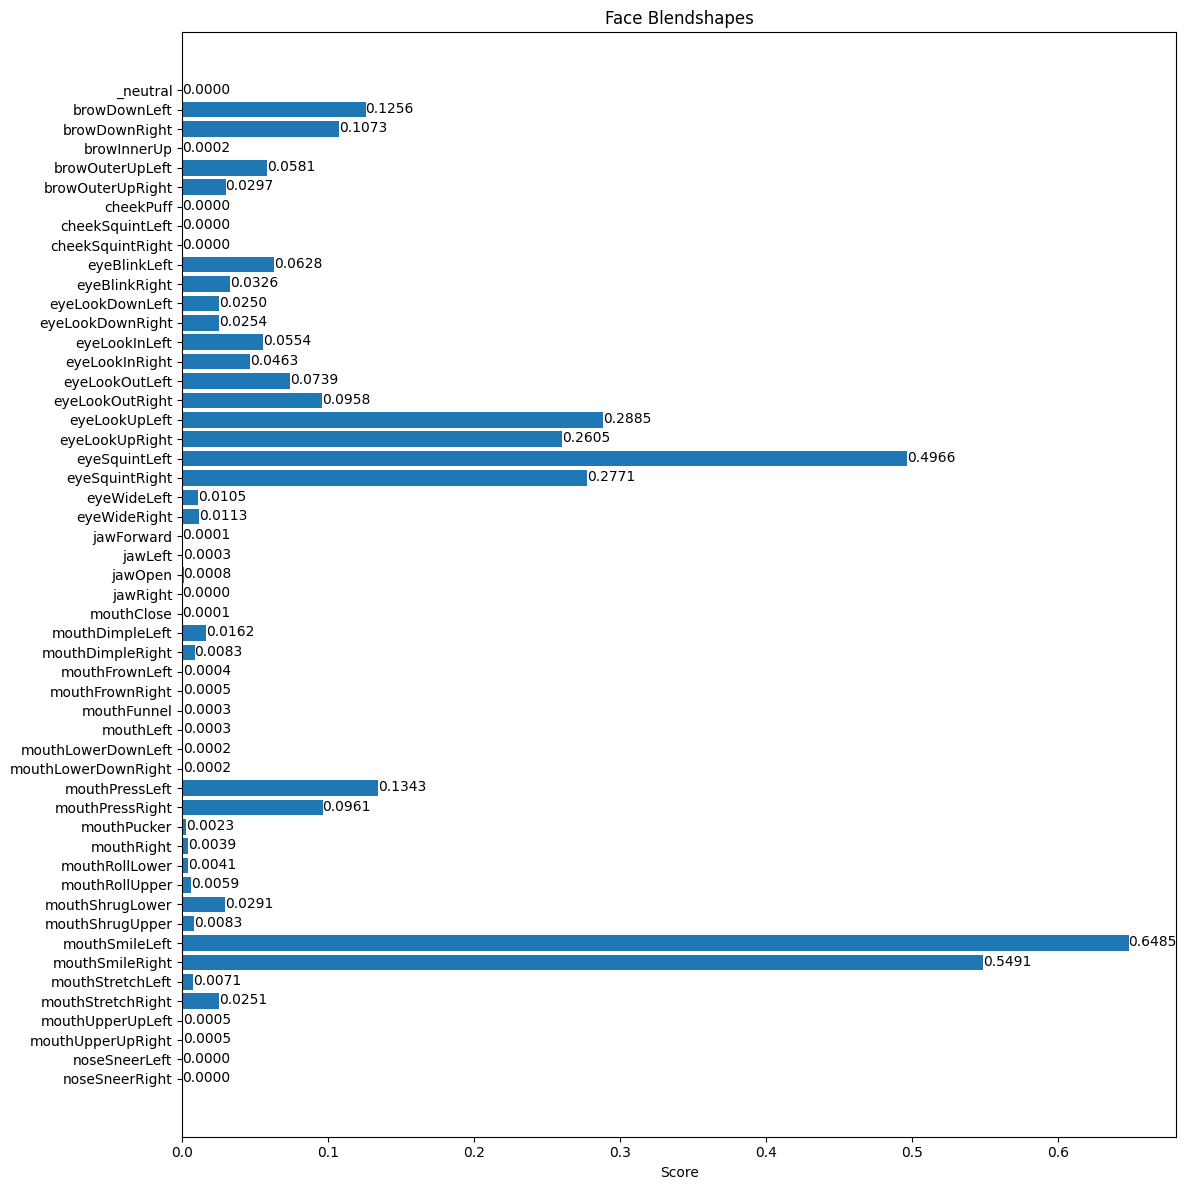

In [32]:
# Visualize the face blendshapes categories using a bar graph
plot_face_blendshapes_bar_graph(face_landmarker_result.face_blendshapes[0])

In [33]:
face_landmarker_result.facial_transformation_matrixes

[array([[ 9.92201149e-01, -6.05320744e-02,  1.08961530e-01,
          1.18726039e+00],
        [ 9.11082625e-02,  9.48767364e-01, -3.02554637e-01,
          2.23698463e+01],
        [-8.50649104e-02,  3.10122460e-01,  9.46882963e-01,
         -6.80052109e+01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]])]

: 